In [7]:
%matplotlib inline


# Scientific Computation Lab 7







In this lab, you will use PCA to analyze the well-known Iris dataset: *The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.*

We will use PCA to reduce the dimension of the dataset to three variables which should "separate" the three species.

Running the code below will import necessary libraries and read in the data set.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

1) What are the shapes of X and y? How does y assign labels to the 3 species?

In [14]:
#add code here
print(X.shape)
print(y.shape)
print(X)

(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

2) Now, create a new matrix $X_2$ which corresponds to $X$ with the mean of each column removed 

In [22]:
#add code here
Xm=X.mean(axis=0)
X2=np.zeros((150,4))

for i in range(150):
    X2[i,:]=X[i,:]-Xm
print(X2)

[[-7.43333333e-01  4.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01 -5.73333333e-02 -2.35800000e+00 -9.99333333e-01]
 [-1.14333333e+00  1.42666667e-01 -2.45800000e+00 -9.99333333e-01]
 [-1.24333333e+00  4.26666667e-02 -2.25800000e+00 -9.99333333e-01]
 [-8.43333333e-01  5.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-4.43333333e-01  8.42666667e-01 -2.05800000e+00 -7.99333333e-01]
 [-1.24333333e+00  3.42666667e-01 -2.35800000e+00 -8.99333333e-01]
 [-8.43333333e-01  3.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.44333333e+00 -1.57333333e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01  4.26666667e-02 -2.25800000e+00 -1.09933333e+00]
 [-4.43333333e-01  6.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.04333333e+00  3.42666667e-01 -2.15800000e+00 -9.99333333e-01]
 [-1.04333333e+00 -5.73333333e-02 -2.35800000e+00 -1.09933333e+00]
 [-1.54333333e+00 -5.73333333e-02 -2.65800000e+00 -1.09933333e+00]
 [-4.33333333e-02  9.42666667e-01 -2.55800000e+00 -9.99333333e

3) Compute the SVD of $A$ where $A=X_2^T$

In [23]:
#add code here
A=X2.T
u, s, vh=np.linalg.svd(A)

3) Now, transform A using U, i.e. compute $G = U^T A$

In [24]:
#add code here
G=np.dot(u.T,A)
print(A)

[[-7.43333333e-01 -9.43333333e-01 -1.14333333e+00 -1.24333333e+00
  -8.43333333e-01 -4.43333333e-01 -1.24333333e+00 -8.43333333e-01
  -1.44333333e+00 -9.43333333e-01 -4.43333333e-01 -1.04333333e+00
  -1.04333333e+00 -1.54333333e+00 -4.33333333e-02 -1.43333333e-01
  -4.43333333e-01 -7.43333333e-01 -1.43333333e-01 -7.43333333e-01
  -4.43333333e-01 -7.43333333e-01 -1.24333333e+00 -7.43333333e-01
  -1.04333333e+00 -8.43333333e-01 -8.43333333e-01 -6.43333333e-01
  -6.43333333e-01 -1.14333333e+00 -1.04333333e+00 -4.43333333e-01
  -6.43333333e-01 -3.43333333e-01 -9.43333333e-01 -8.43333333e-01
  -3.43333333e-01 -9.43333333e-01 -1.44333333e+00 -7.43333333e-01
  -8.43333333e-01 -1.34333333e+00 -1.44333333e+00 -8.43333333e-01
  -7.43333333e-01 -1.04333333e+00 -7.43333333e-01 -1.24333333e+00
  -5.43333333e-01 -8.43333333e-01  1.15666667e+00  5.56666667e-01
   1.05666667e+00 -3.43333333e-01  6.56666667e-01 -1.43333333e-01
   4.56666667e-01 -9.43333333e-01  7.56666667e-01 -6.43333333e-01
  -8.43333

4) The first 3 rows of G are our reduced-dimension representation of the data (check the singular values to assess this approximation). The cell below will plot the these rows on a 3d plot, and you should be able to see a clear "separation" of the three Iris species. This reduced data could then be provided to a classifier which would assign labels (0,1, or 2) to each of the 150 plants.

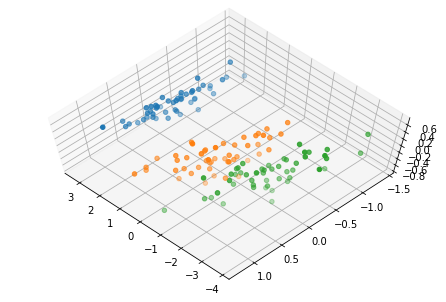

In [25]:
fig = plt.figure()
ax = Axes3D(fig, elev=70, azim=135)
for i in [0,50,100]:
    ax.scatter(G[0,i:i+50],G[1,i:i+50],G[2,i:i+50])
plt.show()

### Task 2: Numerical solution of an initial value problem (again)

In Lab 5, you used *odeint* from scipy.integrate to solve the following IVP:

$\frac{dy_1}{dt} =  -y_2 $

$\frac{dy_2}{dt} = y_1$

$y_1(0)=1, ~ y_2(0)=0$



We can rewrite these equations in matrix form: $\frac{d \mathbf{y}}{dt} = A \mathbf{y}$ and solve the problem above using the *matrix exponential*: $\mathbf{y}(t) = exp(At)\mathbf{y}_0$. Use this method below, and compare your solution to the analytical result. (The matrix exponential is distinct from element-by-element exponentiation using np.exp)

In [5]:
import numpy as np
import scipy
#add code here

